# Решающие деревья

![](https://i0.wp.com/docs.microsoft.com/en-us/azure/machine-learning/studio/media/algorithm-choice/image5.png?resize=495%2C706&ssl=1)

*Source: https://www.upnxtblog.com/index.php/2017/12/06/17-machine-learning-algorithms-that-you-should-know/*

Сами по себе решающие деревья используются в машинном обучении относительно редко, однако очень распространены методы, основанные на их композиции - ансамблях (Random Forest, XGBoost, LightGBM).

## Линейные модели или решающие деревья?

- когда данные хорошо линейно разделимы, линейная модель лучше

- когда данные плохо линейно разделимы (много сложных нелинейных зависимостей в данных), модель, основанная на решающих деревьях, лучше

In [9]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [10]:
plt.rcParams['figure.figsize'] = (11, 6.5)

Линейно разлимый пример

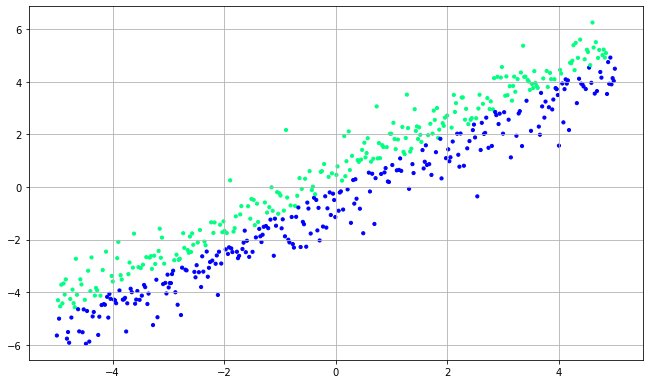

In [11]:
np.random.seed(13)
n = 500
X = np.zeros(shape=(n, 2))
X[:, 0] = np.linspace(-5, 5, 500)
X[:, 1] = X[:, 0] + 0.9 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap='winter')
plt.grid()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

**Задание**: Обучите Логистическую регрессию и посчитайте точность на тесте

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# YOUR CODE HERE

0.992

`mlxtend` позволяет красиво рисовать границы классов. Установим его и нарисуем

In [ ]:
!pip install mlxtend

(-6.0, 5.719438877755511, -6.8724348422776504, 6.389930192311469)

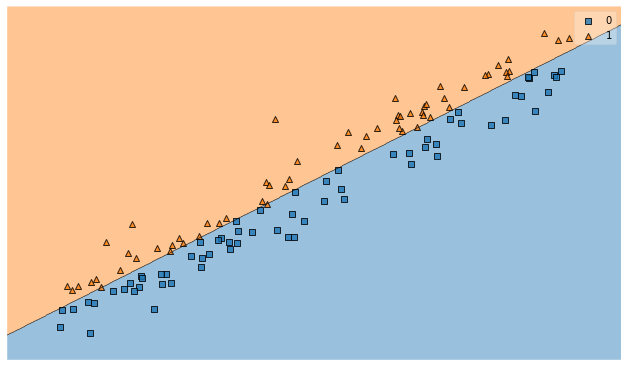

In [17]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test, y_test, lr)
plt.axis('off')

Теперь используем нелинейную модель - `DecisionTreeClassifier`

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_pred_dt, y_test)

0.888

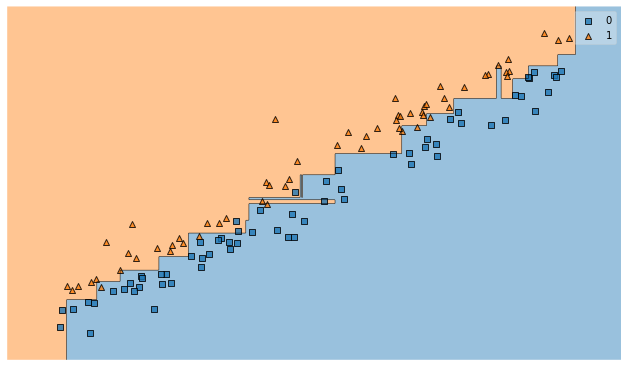

In [19]:
plot_decision_regions(X_test, y_test, dt)
plt.axis('off')
plt.show()

---
Теперь пример, когда данные линейно неразделимы.

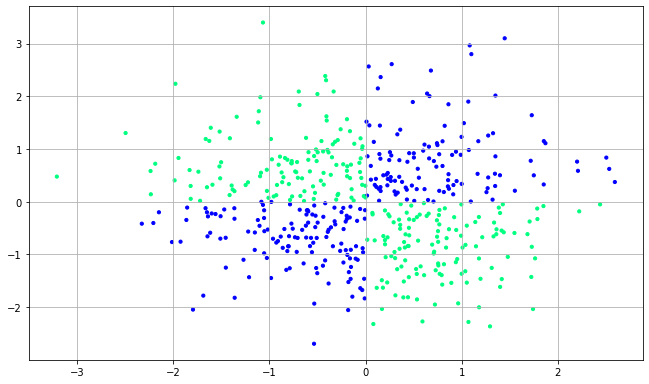

In [20]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap='winter')
plt.grid()
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

---
**Задание**: Обучите Логистическую регрессию и дерево решений. Для обеих моделей посчитайте точность на тесте и нарисуйте границы классов

In [22]:
# Train logistic regression and compute accuracy

# YOUR CODE HERE

print('Accuracy for Logistic Regression ', lr_acc)

# Train Decision Tree and compute accuracy


print('Accuracy for Decision Tree ', tree_acc)

Accuracy for Logistic Regression  0.392
Accuracy for Decision Tree  0.968


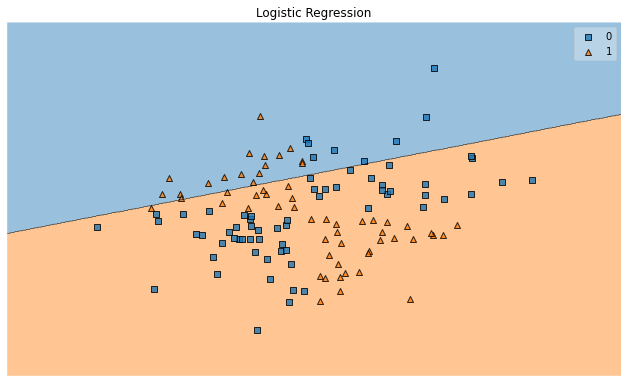

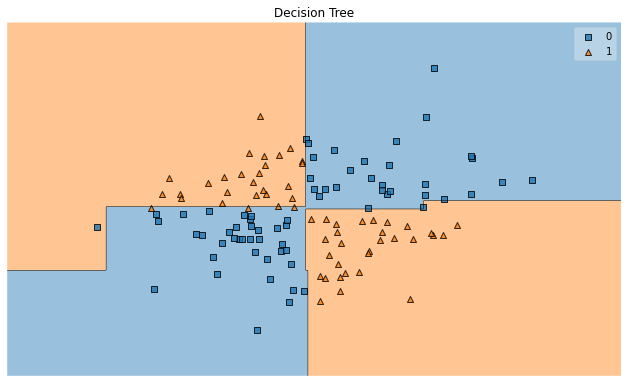

In [23]:
# Plot decision region for logistic regression


# Plot decision region for decision tree


## Переобучение

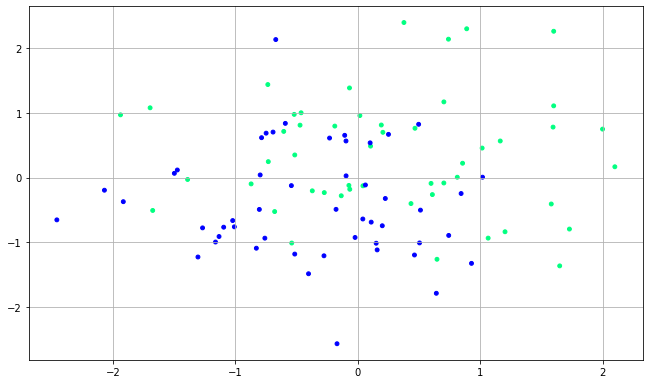

In [24]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=15, c=y, cmap='winter')
plt.grid()
plt.show()

Как влияют разные значения гиперпараметров решающего дерева на его структуру?

In [25]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листовой

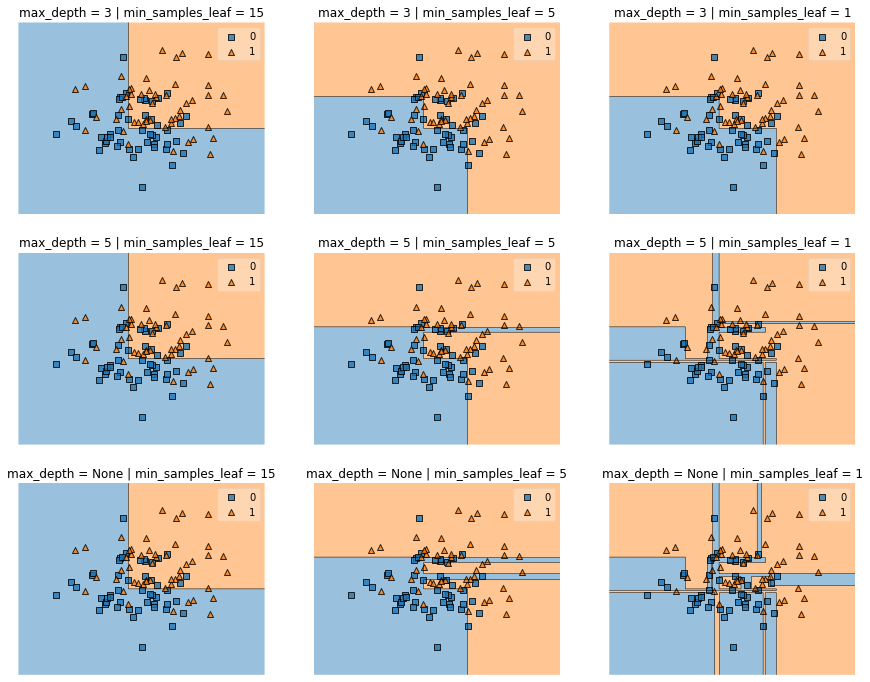

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        ax[i][j].set_title('max_depth = {} | min_samples_leaf = {}'.format(max_depth, min_samples_leaf))
        ax[i][j].axis('off')
        plot_decision_regions(X, y, dt, ax=ax[i][j])
plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

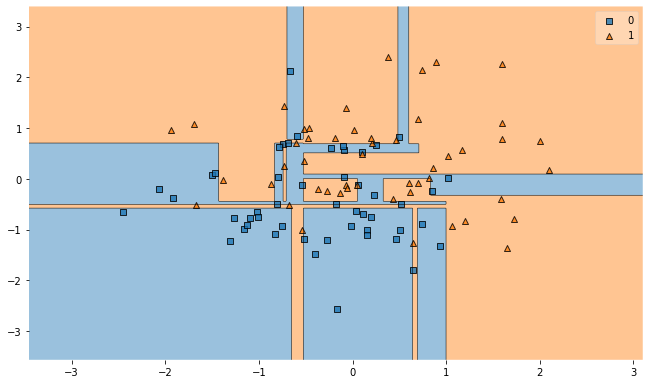

In [30]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=13)
dt.fit(X, y)
plot_decision_regions(X, y, dt)
plt.show()

**Задание** Посчитайте точность алгоритма изображенного выше на обучающей выборке

In [31]:
# YOUR CODE HERE

1.0

## Неустойчивость

**Задание** Посмотрим, как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки исходной выборки. Заполните пропуски в коде

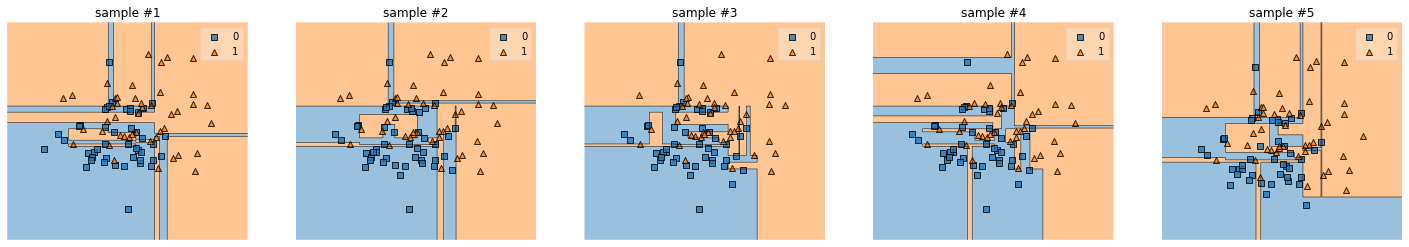

In [32]:
def select_subsample(X, y):
    idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
    X_part, y_part = X[idx_part, :], y[idx_part]
    return X_part, y_part

fig, ax = plt.subplots(ncols=5, figsize=(25, 4))
for i in range(5):
    np.random.seed(i)
    # create subsample

    
    # fit DT

    
    # Plot boundary


plt.show()

## Практика

Теперь потренируемся на более реальном датасете.

In [33]:
import pandas as pd
from sklearn.datasets import load_boston

In [34]:
boston = load_boston()

In [35]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [36]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [38]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
y = boston['target']

print(X.shape, y.shape)

(506, 13) (506,)


In [39]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Задание** Нарисуйте гистограмму для целевой переменной

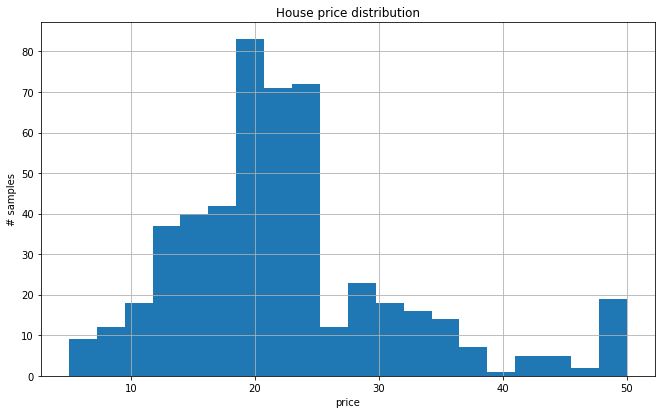

In [40]:

#YOUR CODE HERE


Как всегда, разобьем данные на train и test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

## Решающее дерево: sklearn

In [42]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=13)

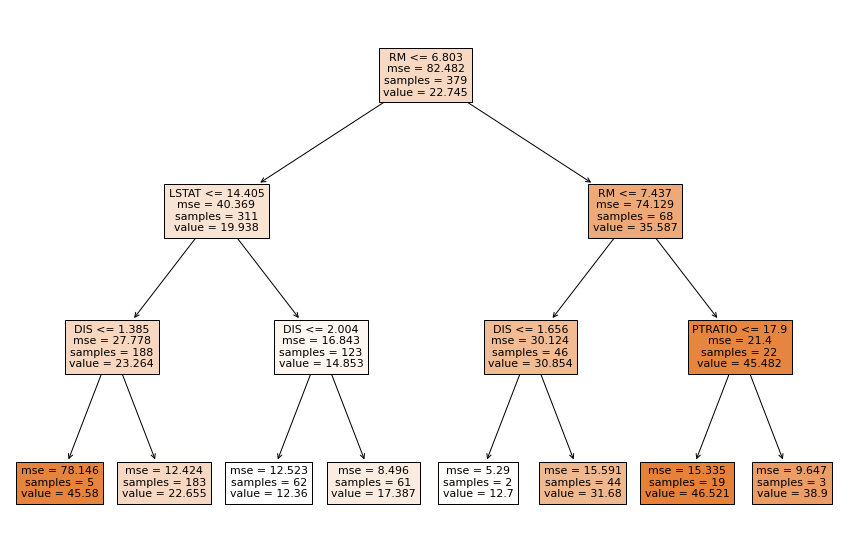

In [45]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, filled=True, rounded=False)
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, dt.predict(X_test), squared=False)

6.140613542993184

**Задание** Давайте посмотрим, как меняется ошибка в зависимости от глубины. Заполните пропуски

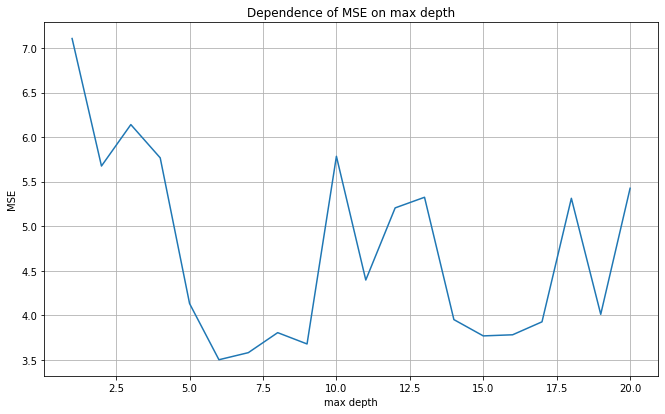

In [48]:
max_depth_array = range(1, 21)
rmse_array = []

for max_depth in max_depth_array:
    # train tree with `max_depth`
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    
    # calculate RMSE and add to the list `rmse_array`
    y_pred = dt.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_array.append(rmse)
    
plt.plot(max_depth_array, rmse_array)
plt.title('Dependence of MSE on max depth')
plt.xlabel('max depth')
plt.ylabel('MSE')
plt.grid()

In [51]:
pd.DataFrame({
    'max_depth': max_depth_array,
    'RMSE': rmse_array
}).sort_values(by='RMSE').reset_index(drop=True)

,max_depth,RMSE
0,6,3.501395
1,7,3.580854
2,9,3.678495
3,15,3.769027
4,16,3.781481
5,8,3.805422
6,17,3.926842
7,14,3.951823
8,19,4.011296
9,5,4.131723


**Задание** Давайте посмотрим, как меняется ошибка в зависимости от параметра `min_samples_leaf` при фиксированной глубине (`max_depth=6`). Заполните пропуски.

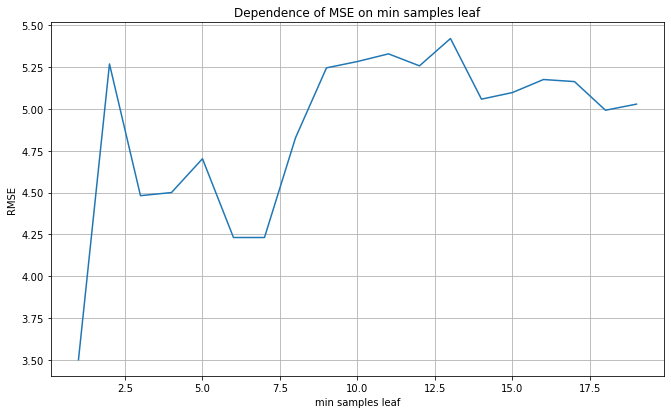

In [54]:
min_samples_leaf_array = range(1, 20)
rmse_array = []
for min_samples_leaf in min_samples_leaf_array:
    # train tree with `min_samples_leaf`


    # calculate RMSE and add to the list `rmse_array`
    
plt.plot(min_samples_leaf_array, rmse_array)
plt.title('Dependence of MSE on min samples leaf')
plt.xlabel('min samples leaf')
plt.ylabel('RMSE')
plt.grid()

In [55]:
pd.DataFrame({
    'min_samples_leaf': min_samples_leaf_array,
    'RMSE': rmse_array
}).sort_values(by='RMSE').reset_index(drop=True)

,min_samples_leaf,RMSE
0,1,3.501395
1,6,4.231875
2,7,4.231912
3,3,4.482013
4,4,4.500586
5,5,4.702759
6,8,4.827069
7,18,4.992586
8,19,5.029053
9,14,5.058738


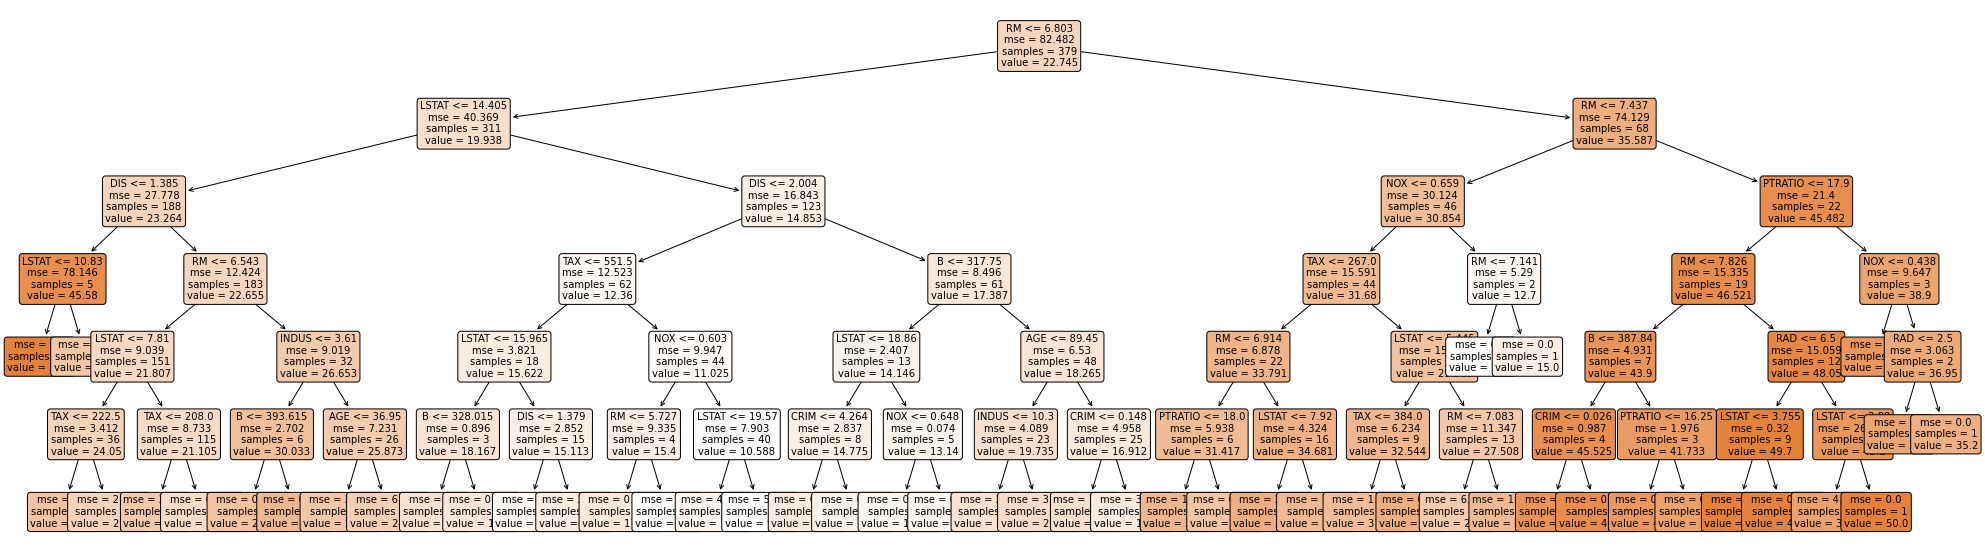

In [56]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=1, random_state=13)
dt.fit(X_train, y_train)

plt.figure(figsize=(35, 10))
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

In [57]:
mean_squared_error(y_test, dt.predict(X_test), squared=False)

3.501395298899627

Решающие деревья позволяют посчитать важность признаков

In [58]:
dt.feature_importances_

array([0.0017915 , 0.        , 0.00353474, 0.        , 0.02687167,
       0.59766384, 0.00478304, 0.11292126, 0.0035135 , 0.02381713,
       0.0062183 , 0.00726   , 0.21162502])

In [59]:
pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

,feature,importance
0,RM,0.597664
1,LSTAT,0.211625
2,DIS,0.112921
3,NOX,0.026872
4,TAX,0.023817
5,B,0.007260
6,PTRATIO,0.006218
7,AGE,0.004783
8,INDUS,0.003535
9,RAD,0.003514


Влияет ли стандартизация (масштабирование) признаков на результат работы решающего дерева?

In [60]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
207,0.25199,0.0,10.59,0.0,0.489,5.783,72.7,4.3549,4.0,277.0,18.6,389.43,18.06
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00


In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
61,-0.382049,0.606785,-0.848363,-0.260011,-0.851779,-0.488599,0.896957,1.486665,-0.159888,-0.690253,0.592093,0.185671,0.285327
97,-0.388162,-0.486443,-1.176083,-0.260011,-0.922106,2.624087,0.271248,-0.164958,-0.859089,-0.737557,-0.214771,0.404139,-1.192625
13,-0.327024,-0.486443,-0.407990,-0.260011,-0.104556,-0.513761,-0.239387,0.437534,-0.626022,-0.554256,1.209107,0.404139,-0.607512
207,-0.372405,-0.486443,-0.049546,-0.260011,-0.535308,-0.759460,0.152580,0.262298,-0.626022,-0.731644,0.070004,0.317425,0.808317
110,-0.389711,-0.486443,-0.346542,-0.260011,-0.262791,-0.149652,-0.505493,-0.521493,-0.509488,-0.098960,1.161645,0.364554,0.077287


In [62]:
# without scaling
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test), squared=False))

6.140613542993184
3.501395298899627


In [63]:
# with scaling
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train_scaled, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test_scaled), squared=False))

6.140613542993184
3.501395298899627


### Мультиклассовая классификация

Теперь решим задачу многоклассовой классификации.

In [64]:
from sklearn.datasets import load_digits
data = load_digits()

In [65]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [68]:
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [69]:
y = data['target']
X = data['data']
print(X.shape, y.shape)

(1797, 64) (1797,)


In [70]:
# images contain 8x8 black'n'white pictures of hadwritten digits
data['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

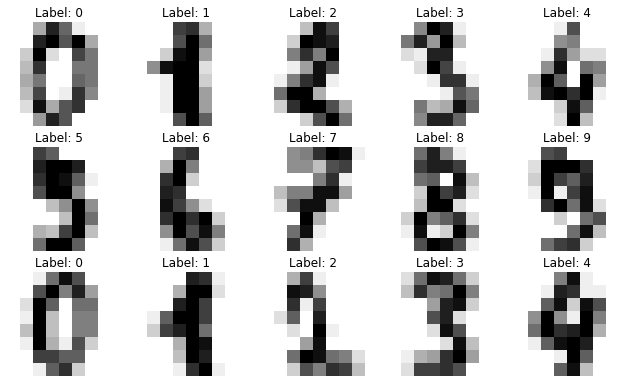

In [71]:
# make a plot
_, axes = plt.subplots(3, 5)
axes = axes.flatten()

for ax, image, label in zip(axes, data['images'], data['target']):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Label: {}'.format(label))

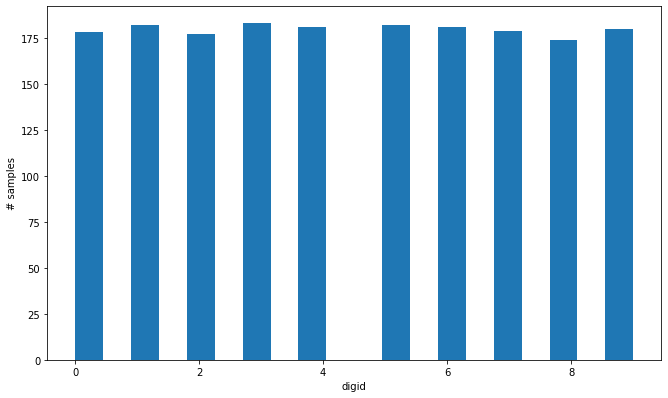

In [72]:
plt.xlabel('digid')
plt.ylabel('# samples')
plt.hist(y, bins=20)
plt.show()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

Для начала, вспомним как применять линейные модели для многоклассовой классификации

## One-vs-Rest

`sklearn.multiclass.OneVsRestClassifier` превращает модель бинарной классификации в модель многоклассовой по принципу One-vs-Rest

In [74]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(LogisticRegression(random_state=13, penalty='none', max_iter=3000))
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [85]:
classifier.predict_proba(X_test).shape

(450, 10)

In [86]:
accuracy_score(y_pred, y_test)

0.9066666666666666

**Задание** посчитайте roc_auc с макро усреднением

In [87]:
from sklearn.metrics import roc_auc_score
?roc_auc_score

Signature:
roc_auc_score(
    y_true,
    y_score,
    *,
    average='macro',
    sample_weight=None,
    max_fpr=None,
    multi_class='raise',
    labels=None,
)
Docstring:
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from prediction scores.

Note: this implementation can be used with binary, multiclass and
multilabel classification, but some restrictions apply (see Parameters).

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
    True labels or binary label indicators. The binary and multiclass cases
    expect labels with shape (n_samples,) while the multilabel case expects
    binary label indicators with shape (n_samples, n_classes).

y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
    Target scores. In the binary and multilabel cases, these can be either
    probability estimates or non-thresholded decision values (as returned
    by `dec

In [91]:
# your code here
y_pred = classifier.predict_proba(X_test)
roc_auc_score(y_test, y_pred, average='macro', multi_class='ovr')

0.9919413011755491

## One-vs-One

`sklearn.multiclass.OneVsOneClassifier` превращает модель бинарной классификации в модель многоклассовой по принципу One-vs-One

In [101]:
from sklearn.multiclass import OneVsOneClassifier
classifier = OneVsOneClassifier(LogisticRegression(random_state=13, penalty='none', max_iter=3000))
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_pred, y_test)

0.9622222222222222

**Задание** посчитайте roc_auc

In [106]:
# YOUR CODE HERE

0.994305976481453

## Decision Tree

Умеет работать в любым количеством классов

In [95]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_pred, y_test)

0.8466666666666667

Давайте попробуем улучшить результат решающего дерева.

**Задание** Ипользуя GridSearchCV подберите гиперпараметры модели DecisionTreeClassifier

In [98]:
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier(random_state=13)

# define parameter grid
param_grid = {
    # YOUR CODE HERE
}

# fit 
# YOUR CODE HERE

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=13),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 20, 2)},
             scoring='accuracy')

In [99]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1}

**Задание** Посчитайте точность лучшего алгоритма на тесте

In [100]:
# YOUR CODE HERE

0.8533333333333334

In [3]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']